In [25]:
# Libraries here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import seaborn as sns
% matplotlib inline
sns.set_style("white")


In [3]:
df = pd.read_csv('ml_house_data_set.csv')
df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2519996.0
3,2004,1,4,2,0,1829,2277,attached,479,0,True,False,True,True,3302,Michelle Highway,NaN,Lake Christinaport,11203,197193.0
4,2006,1,4,2,0,1580,1749,attached,430,0,True,False,True,True,582,Jacob Cape,NaN,Lake Christinaport,11203,207897.0


In [4]:
df.describe()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,house_number,unit_number,zip_code,sale_price
count,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,42703.000000,3088.000000,42703.000000,4.270300e+04
mean,1990.993209,1.365759,3.209283,1.923659,0.527153,1987.758986,2127.155446,455.849800,41.656324,18211.767347,2027.395402,11030.991476,4.135071e+05
std,19.199987,0.513602,1.043396,0.759699,0.499268,846.766270,922.807342,243.453463,168.715867,27457.109993,1141.383770,573.576228,3.185497e+05
min,1852.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,5.000000,-4.000000,0.000000,0.000000,3.000000,10004.000000,6.260000e+02
25%,1980.000000,1.000000,3.000000,1.000000,0.000000,1380.000000,1466.000000,412.000000,0.000000,674.000000,1063.000000,10537.000000,2.708990e+05
50%,1994.000000,1.000000,3.000000,2.000000,1.000000,1808.000000,1937.000000,464.000000,0.000000,4530.000000,2033.000000,11071.000000,3.780010e+05
75%,2005.000000,2.000000,4.000000,2.000000,1.000000,2486.000000,2640.000000,606.000000,0.000000,24844.500000,2921.000000,11510.000000,4.976970e+05
max,2017.000000,4.000000,31.000000,8.000000,1.000000,12406.000000,15449.000000,8318.000000,9200.000000,99971.000000,3998.000000,11989.000000,2.104200e+07


In [5]:
# -- drop the columns which will not be useful in traning model 
df_new = df.drop(['house_number','unit_number','street_name','zip_code'] , axis = 1)

### Feature Engineering 

1. Choose the features that have the most signal.
    - We use our intuition such as total square ft column will be more useful to predict housing price than the unit number 
   
2. Combine the multiple features into one feature . 
   -  Eg. if there are two columns height (feet) and height (inches)
    Then, we can combine them into one column
3. Binning 
    - Replace an exact numerical measurement with a more broad category
    Eg. Swimming pool length could be reduced to categorical data such as There is a swimming pool attached to the house or not
    
4. One-hot encoding
    - a way to represent categorical data as numbers without creating 
    Eg. Neighborhood name could be changed to Brooklyn , Queens as IS_Brooklyn (1,0)
    

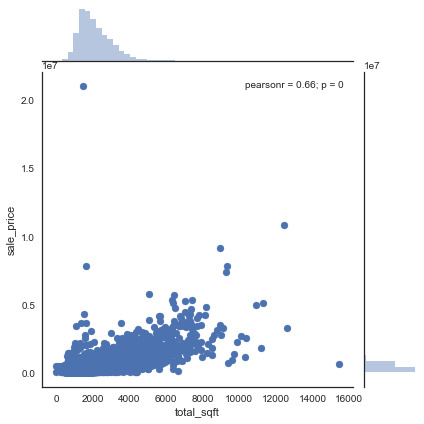

In [26]:
sns.jointplot(x ="total_sqft", y ="sale_price", data = df)

In [10]:
features_df = pd.get_dummies(df_new , columns=['garage_type','city'])
features_df = features_df.drop(['sale_price'], axis= 1)
features_df.head()

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_sqft,carport_sqft,has_fireplace,...,city_South Anthony,city_South Stevenfurt,city_Toddshire,city_Wendybury,city_West Ann,city_West Brittanyview,city_West Gerald,city_West Gregoryview,city_West Lydia,city_West Terrence
0,1978,1,4,1,1,1689,1859,508,0,True,...,0,0,0,0,0,0,0,0,0,0
1,1958,1,3,1,1,1984,2002,462,0,True,...,0,0,0,0,0,0,0,0,0,0
2,2002,1,3,2,0,1581,1578,0,625,False,...,0,0,0,0,0,0,0,0,0,0
3,2004,1,4,2,0,1829,2277,479,0,True,...,0,0,0,0,0,0,0,0,0,0
4,2006,1,4,2,0,1580,1749,430,0,True,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X = features_df.as_matrix()
y = df['sale_price'].as_matrix()
X

array([[1978, 1, 4, ..., 0, 0, 0],
       [1958, 1, 3, ..., 0, 0, 0],
       [2002, 1, 3, ..., 0, 0, 0],
       ..., 
       [1983, 1, 1, ..., 0, 0, 0],
       [1981, 1, 3, ..., 0, 0, 0],
       [1980, 1, 3, ..., 0, 0, 0]], dtype=object)

Splitting the data into two groups. 70% of the data into training and 30% into testing. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 0)

### Gradient Boosting 

Here are the brief explanation of the parameters we use in gradient boosting model

#### n_estimator:
     - tells the model how many decision tree to build
     - Higher numbers usually allow the model to be more accurate but long latency
    
#### learning rate:
     - controls how much each additional decision tree influences overall prediction
     - lower rates mean higher accuracy but only works with high estimators.
 
#### Max_Depth:
     - controls how many layers deep each individual decision tree can be
 
#### Min_sample_leaf:
     - controls how many times a value must appear in our training set for a decision tree
     - for example, 9 means at least 9 houses must exhibit the same characteristic before we 
     consider it meaningful enough to build dicision tree around it. This helps prevent single
     outliers from influencing the model too much

#### Max_feature:
    - is the percentage of features in our model that we randomly choose to consider each time we create a branch in our decision tree

#### loss:
    - calculate the model's error rate or cost sa it learns. Huber function does a good job while not being too influenced by outliers in the data set

In [20]:
#use gradient boosting regressor
model = ensemble.GradientBoostingRegressor(n_estimators = 1000,
                                          learning_rate = 0.1,
                                          max_depth = 6,
                                          min_samples_leaf = 9,
                                          max_features = 0.1,
                                           loss = 'huber')

In [21]:
model.fit(X_train,y_train)
joblib.dump(model, 'trained_house_classifier_model.pkl')

['trained_house_classifier_model.pkl']

In [23]:
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error {}".format(mse))

Training Set Mean Absolute Error 48437.11634809408


In [24]:
mse_test = mean_absolute_error(y_test, model.predict(X_test))
print("Testing Set Mean Absolute Error {}".format(mse_test))

Testing Set Mean Absolute Error 58388.26673542328




#### Overfitting: 
    Training set error very low but testing set error very high 
#### Underfitting: 
    Both are high means underfit : did not capture the model well
    
In our model, the testing error is higher than traning set. 